In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
test_data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\filtered_test_data.csv')
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,230,1016.53,24.0,0.0,1,...,9.6,20.8,9.5,4.6,4.8,0.4,Canada,44.710000,-63.630000,3.5
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,280,1015.60,24.1,0.0,1,...,39.0,310.7,59.4,3.0,9.6,1.5,Canada,52.183056,-122.054170,939.7
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,350,1021.90,24.1,4.3,0,...,14.3,481.2,26.6,0.4,0.5,0.0,Canada,64.110000,-117.330000,221.0
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,300,1004.80,19.9,7.2,0,...,0.1,0.4,0.1,0.0,0.0,0.0,Canada,47.613056,-57.610280,6.7
4,2012-04-08 12:00:00,4.9,-10.5,31.0,32.3,330,1029.73,34.2,0.0,12,...,17.5,426.9,31.7,17.3,26.2,8.8,Canada,51.820000,-111.680000,804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289829,2014-07-19 12:00:00,24.0,13.0,50.0,13.0,130,1025.20,16.1,0.0,2,...,14.0,79.4,19.5,5.7,8.7,1.3,United States,43.645645,-70.308620,23.1
289830,2011-09-28 12:00:00,14.8,4.5,51.0,14.0,240,1015.74,36.2,0.0,4,...,5.0,177.0,10.0,5.1,5.0,0.5,France,43.914722,2.116389,172.0
289831,2010-08-15 12:00:00,21.0,20.0,94.0,13.0,140,1010.00,14.5,6.0,0,...,19.6,296.5,33.7,0.1,0.1,0.0,Canada,45.950000,-77.316666,130.1
289832,2019-06-30 12:00:00,26.9,16.3,52.0,9.9,32,1016.20,17.7,0.0,1,...,17.7,99.3,24.5,4.9,8.7,1.2,Canada,41.948612,-82.518890,176.8


In [3]:
test_data = test_data.iloc[:20000]       
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,230,1016.53,24.0,0.00,1,...,9.6,20.8,9.5,4.6,4.8,0.4,Canada,44.710000,-63.63000,3.5
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,280,1015.60,24.1,0.00,1,...,39.0,310.7,59.4,3.0,9.6,1.5,Canada,52.183056,-122.05417,939.7
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,350,1021.90,24.1,4.30,0,...,14.3,481.2,26.6,0.4,0.5,0.0,Canada,64.110000,-117.33000,221.0
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,300,1004.80,19.9,7.20,0,...,0.1,0.4,0.1,0.0,0.0,0.0,Canada,47.613056,-57.61028,6.7
4,2012-04-08 12:00:00,4.9,-10.5,31.0,32.3,330,1029.73,34.2,0.00,12,...,17.5,426.9,31.7,17.3,26.2,8.8,Canada,51.820000,-111.68000,804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-08-22 12:00:00,16.0,4.0,45.0,7.4,20,1016.10,8.0,0.00,3,...,140.3,598.0,176.8,8.1,33.3,13.4,United States,42.905860,-106.46364,1628.9
19996,2013-10-05 12:00:00,14.7,-0.9,34.0,19.2,295,1020.50,22.0,0.00,1,...,26.0,323.0,43.3,9.5,19.9,5.4,Canada,49.900000,-109.47000,766.7
19997,2014-04-27 12:00:00,9.0,-5.0,37.0,14.8,140,1002.10,24.1,0.01,1,...,9.0,69.0,13.5,5.4,6.9,0.8,Canada,52.183056,-122.05417,939.7
19998,2018-09-30 12:00:00,12.9,5.1,59.0,9.0,232,1024.40,16.5,0.20,0,...,3.2,119.9,6.1,1.4,0.7,0.0,Canada,47.420000,-68.32000,154.2


In [4]:
test_data.columns

Index(['report_date', 'temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction',
       'atmospheric_pressure', 'visibility', 'precipitation', 'rain_days',
       'snow_on_ground', 'fine_fuel_moisture_code', 'duff_moisture_code',
       'drought_code', 'build_up_index', 'initial_spread_index',
       'fire_weather_index', 'daily_severity_rating', 'country', 'latitude',
       'longitude', 'elevation'],
      dtype='object')

In [5]:
test_data = test_data.drop(['wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,1016.53,0.00,1,87.9,9.6,20.8,9.5,4.6,4.8,Canada
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,1015.60,0.00,1,86.1,39.0,310.7,59.4,3.0,9.6,Canada
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,1021.90,4.30,0,53.6,14.3,481.2,26.6,0.4,0.5,Canada
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,1004.80,7.20,0,33.2,0.1,0.4,0.1,0.0,0.0,Canada
4,2012-04-08 12:00:00,4.9,-10.5,31.0,32.3,1029.73,0.00,12,88.4,17.5,426.9,31.7,17.3,26.2,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-08-22 12:00:00,16.0,4.0,45.0,7.4,1016.10,0.00,3,91.9,140.3,598.0,176.8,8.1,33.3,United States
19996,2013-10-05 12:00:00,14.7,-0.9,34.0,19.2,1020.50,0.00,1,88.8,26.0,323.0,43.3,9.5,19.9,Canada
19997,2014-04-27 12:00:00,9.0,-5.0,37.0,14.8,1002.10,0.01,1,86.4,9.0,69.0,13.5,5.4,6.9,Canada
19998,2018-09-30 12:00:00,12.9,5.1,59.0,9.0,1024.40,0.20,0,77.5,3.2,119.9,6.1,1.4,0.7,Canada


In [6]:
# Load saved PowerTransformer dictionary
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

# Load saved StandardScaler
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load saved OneHotEncoding
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\one_hot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)
    
# Load saved LR_Model
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\linear_regression_model.pkl', 'rb') as f:
    LR_model = pickle.load(f)

In [7]:
col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']
for col, pt in power_transformers.items():
    # Transform test column using fitted transformer
    transformed = pt.transform(test_data[col].values.reshape(-1, 1))
    test_data[col + '_transformed'] = transformed.flatten()


In [8]:
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,1016.53,0.00,1,87.9,9.6,...,4.6,4.8,Canada,186035.474199,2.751837,6.014705,2.962194,1.609970,1.759289,2.879488
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,1015.60,0.00,1,86.1,39.0,...,3.0,9.6,Canada,175161.077794,4.702219,21.879823,6.200391,1.312615,2.363436,1.922798
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,1021.90,4.30,0,53.6,14.3,...,0.4,0.5,Canada,44280.026140,3.258445,26.464993,4.617759,0.332011,0.405541,3.546321
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,1004.80,7.20,0,33.2,0.1,...,0.0,0.0,Canada,11167.773123,0.095888,0.359822,0.096176,-0.000000,0.000000,5.929487
4,2012-04-08 12:00:00,4.9,-10.5,31.0,32.3,1029.73,0.00,12,88.4,17.5,...,17.3,26.2,Canada,189133.281602,3.530003,25.130081,4.940778,2.595383,3.308272,5.852644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-08-22 12:00:00,16.0,4.0,45.0,7.4,1016.10,0.00,3,91.9,140.3,...,8.1,33.3,United States,211776.421884,6.885780,29.055378,8.805268,2.025253,3.540936,2.879488
19996,2013-10-05 12:00:00,14.7,-0.9,34.0,19.2,1020.50,0.00,1,88.8,26.0,...,9.5,19.9,Canada,191635.908240,4.090428,22.255402,5.545732,2.144627,3.044030,4.643411
19997,2014-04-27 12:00:00,9.0,-5.0,37.0,14.8,1002.10,0.01,1,86.4,9.0,...,5.4,6.9,Canada,176943.506194,2.673547,11.010582,3.481780,1.725790,2.068841,4.106548
19998,2018-09-30 12:00:00,12.9,5.1,59.0,9.0,1024.40,0.20,0,77.5,3.2,...,1.4,0.7,Canada,128972.131637,1.573795,14.268979,2.373471,0.845690,0.530759,3.197404


In [9]:
numeric_cols = test_data.select_dtypes(include=['float64', 'int']).columns
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

In [10]:
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,2015-06-26 12:00:00,0.492464,-0.188949,-0.904760,-0.890863,0.267351,-0.368303,-0.342095,0.694467,-0.561814,...,-0.065803,-0.425717,Canada,0.787838,-0.407068,-1.486298,-0.752825,0.393705,-0.012296,-0.909463
1,2011-08-24 12:00:00,0.273991,-0.246678,-0.796893,-1.322403,0.128129,-0.368303,-0.342095,0.602293,0.530030,...,-0.333650,-0.059884,Canada,0.624227,0.873355,0.588292,0.900011,0.014078,0.482518,-1.748633
2,2010-08-13 12:00:00,-0.244882,0.041969,0.183718,-0.470987,1.071242,0.299094,-0.597480,-1.061956,-0.387268,...,-0.768901,-0.753441,Canada,-1.344939,-0.074481,1.187868,0.092207,-1.237837,-1.121054,-0.324544
3,2015-12-13 12:00:00,-1.828810,-1.314672,0.580865,2.129912,-1.488635,0.749199,-0.597480,-2.106593,-0.914621,...,-0.835863,-0.791549,Canada,-1.843128,-2.150696,-2.225754,-2.215695,-1.661708,-1.453204,1.765875
4,2012-04-08 12:00:00,-1.651301,-2.628016,-1.336229,2.013279,2.243395,-0.368303,2.467150,0.720070,-0.268427,...,2.060231,1.205286,Canada,0.834446,0.103796,1.013309,0.257081,1.651759,1.256366,1.698472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-08-22 12:00:00,-0.135646,-0.535325,-0.649802,-0.890863,0.202979,-0.368303,0.168677,0.899297,4.292066,...,0.520112,1.746414,United States,1.175122,2.306860,1.526597,2.229590,0.923887,1.446924,-0.909463
19996,2013-10-05 12:00:00,-0.313155,-1.242511,-1.189138,0.485397,0.861661,-0.368303,-0.342095,0.740553,0.047242,...,0.754478,0.725131,Canada,0.872099,0.471715,0.637404,0.565861,1.076289,1.039944,0.637780
19997,2014-04-27 12:00:00,-1.091465,-1.834237,-1.042046,-0.027785,-1.892826,-0.366751,-0.342095,0.617655,-0.584097,...,0.068120,-0.265665,Canada,0.651045,-0.458466,-0.833016,-0.487619,0.541570,0.241236,0.166866
19998,2018-09-30 12:00:00,-0.558937,-0.376570,0.036626,-0.704252,1.445492,-0.337261,-0.597480,0.161907,-0.799495,...,-0.601497,-0.738198,Canada,-0.070707,-1.180452,-0.406934,-1.053321,-0.582035,-1.018498,-0.630600


In [11]:
test_data = test_data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [12]:
test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
test_data['RH_TEMP'] = test_data['temperature'] * test_data['relative_humidity']
test_data['RD_FFMC'] =  test_data['fine_fuel_moisture_code_transformed'] * test_data['rain_days']
test_data['DC_RD'] =  test_data['drought_code_transformed'] * test_data['rain_days']
test_data['WS_TENP'] =  test_data['wind_speed_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['IST_WS'] =  test_data['wind_speed_transformed'] * test_data['initial_spread_index_transformed']
test_data['ISI_FFMC'] =  test_data['initial_spread_index_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['ISI_RH'] =  test_data['initial_spread_index_transformed'] * test_data['relative_humidity']
test_data['DMC_TEMP'] =  test_data['duff_moisture_code_transformed'] * test_data['temperature']
test_data['DMC_RD'] =  test_data['duff_moisture_code_transformed'] * test_data['rain_days']
test_data['RD_TEMP'] =  test_data['rain_days'] * test_data['temperature']
test_data['DMC_DC'] =  test_data['drought_code_transformed'] * test_data['duff_moisture_code_transformed']
test_data['BUI_DC'] =  test_data['drought_code_transformed'] * test_data['build_up_index_transformed']
test_data['BUI_DMC'] =  test_data['duff_moisture_code_transformed'] * test_data['build_up_index_transformed']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\3843077778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\3843077778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\3843077778.py:3: SettingWithCopy

In [13]:
test_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,...,WS_TENP,IST_WS,ISI_FFMC,ISI_RH,DMC_TEMP,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC
0,0.492464,-0.188949,-0.904760,0.267351,-0.368303,-0.342095,Canada,0.787838,-0.407068,-1.486298,...,-0.716509,-0.358061,0.310176,-0.356209,-0.200466,0.139256,-0.168469,0.605024,1.118922,0.306451
1,0.273991,-0.246678,-0.796893,0.128129,-0.368303,-0.342095,Canada,0.624227,0.873355,0.588292,...,-1.091545,-0.024618,0.008788,-0.011219,0.239291,-0.298770,-0.093731,0.513787,0.529469,0.786030
2,-0.244882,0.041969,0.183718,1.071242,0.299094,-0.597480,Canada,-1.344939,-0.074481,1.187868,...,0.436492,0.401732,1.664816,-0.227412,0.018239,0.044501,0.146312,-0.088474,0.109529,-0.006868
3,-1.828810,-1.314672,0.580865,-1.488635,0.749199,-0.597480,Canada,-1.843128,-2.150696,-2.225754,...,-3.254734,-2.934368,3.062741,-0.965228,3.933215,1.284998,1.092678,4.786920,4.931593,4.765285
4,-1.651301,-2.628016,-1.336229,2.243395,-0.368303,2.467150,Canada,0.834446,0.103796,1.013309,...,1.417282,2.805466,1.378303,-2.207129,-0.171399,0.256081,-4.074007,0.105178,0.260503,0.026684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.135646,-0.535325,-0.649802,0.202979,-0.368303,0.168677,United States,1.175122,2.306860,1.526597,...,-1.068731,-0.840241,1.085680,-0.600343,-0.312916,0.389114,-0.022880,3.521646,3.403686,5.143350
19996,-0.313155,-1.242511,-1.189138,0.861661,-0.368303,-0.342095,Canada,0.872099,0.471715,0.637404,...,0.556207,0.686436,0.938631,-1.279856,-0.147720,-0.161371,0.107129,0.300673,0.360682,0.266925
19997,-1.091465,-1.834237,-1.042046,-1.892826,-0.366751,-0.342095,Canada,0.651045,-0.458466,-0.833016,...,0.108637,0.090369,0.352586,-0.564341,0.500399,0.156839,0.373384,0.381909,0.406194,0.223556
19998,-0.558937,-0.376570,0.036626,1.445492,-0.337261,-0.597480,Canada,-0.070707,-1.180452,-0.406934,...,0.044588,0.367031,0.041154,-0.021318,0.659798,0.705297,0.333954,0.480366,0.428632,1.243394


In [14]:
test_data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'atmospheric_pressure', 'precipitation', 'rain_days', 'country',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed', 'FFMC__TEMP', 'FFMC_RH', 'RH_TEMP', 'RD_FFMC',
       'DC_RD', 'WS_TENP', 'IST_WS', 'ISI_FFMC', 'ISI_RH', 'DMC_TEMP',
       'DMC_RD', 'RD_TEMP', 'DMC_DC', 'BUI_DC', 'BUI_DMC'],
      dtype='object')

In [15]:
encoded_array = ohe.transform(test_data[['country']])  
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['country']))
new_data_encoded = pd.concat([test_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [18]:
new_data_encoded.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed', 'FFMC__TEMP', 'FFMC_RH', 'RH_TEMP', 'RD_FFMC',
       'DC_RD', 'WS_TENP', 'IST_WS', 'ISI_FFMC', 'ISI_RH', 'DMC_TEMP',
       'DMC_RD', 'RD_TEMP', 'DMC_DC', 'BUI_DC', 'BUI_DMC', 'country_Canada',
       'country_France', 'country_Spain', 'country_United Kingdom',
       'country_United States'],
      dtype='object')

In [19]:
#new_data_encoded = new_data_encoded.drop(['country'], axis =1)
new_data_encoded

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,...,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,0.492464,-0.188949,-0.904760,0.267351,-0.368303,-0.342095,0.787838,-0.407068,-1.486298,-0.752825,...,0.139256,-0.168469,0.605024,1.118922,0.306451,1,0,0,0,0
1,0.273991,-0.246678,-0.796893,0.128129,-0.368303,-0.342095,0.624227,0.873355,0.588292,0.900011,...,-0.298770,-0.093731,0.513787,0.529469,0.786030,1,0,0,0,0
2,-0.244882,0.041969,0.183718,1.071242,0.299094,-0.597480,-1.344939,-0.074481,1.187868,0.092207,...,0.044501,0.146312,-0.088474,0.109529,-0.006868,1,0,0,0,0
3,-1.828810,-1.314672,0.580865,-1.488635,0.749199,-0.597480,-1.843128,-2.150696,-2.225754,-2.215695,...,1.284998,1.092678,4.786920,4.931593,4.765285,1,0,0,0,0
4,-1.651301,-2.628016,-1.336229,2.243395,-0.368303,2.467150,0.834446,0.103796,1.013309,0.257081,...,0.256081,-4.074007,0.105178,0.260503,0.026684,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.135646,-0.535325,-0.649802,0.202979,-0.368303,0.168677,1.175122,2.306860,1.526597,2.229590,...,0.389114,-0.022880,3.521646,3.403686,5.143350,0,0,0,0,1
19996,-0.313155,-1.242511,-1.189138,0.861661,-0.368303,-0.342095,0.872099,0.471715,0.637404,0.565861,...,-0.161371,0.107129,0.300673,0.360682,0.266925,1,0,0,0,0
19997,-1.091465,-1.834237,-1.042046,-1.892826,-0.366751,-0.342095,0.651045,-0.458466,-0.833016,-0.487619,...,0.156839,0.373384,0.381909,0.406194,0.223556,1,0,0,0,0
19998,-0.558937,-0.376570,0.036626,1.445492,-0.337261,-0.597480,-0.070707,-1.180452,-0.406934,-1.053321,...,0.705297,0.333954,0.480366,0.428632,1.243394,1,0,0,0,0


In [20]:
# Prepare features and target from your new test data
X = new_data_encoded.drop('fire_weather_index_transformed', axis = 1)
y = new_data_encoded['fire_weather_index_transformed']

In [21]:
# Predict on the features
y_test_pred = LR_model.predict(X)

# Evaluate if target is available
if y is not None:
    from sklearn.metrics import r2_score, mean_squared_error
    print('Test R²:', r2_score(y, y_test_pred))
    print('Test MSE:', mean_squared_error(y, y_test_pred))


Test R²: 0.9811098175575897
Test MSE: 0.018819679016076337


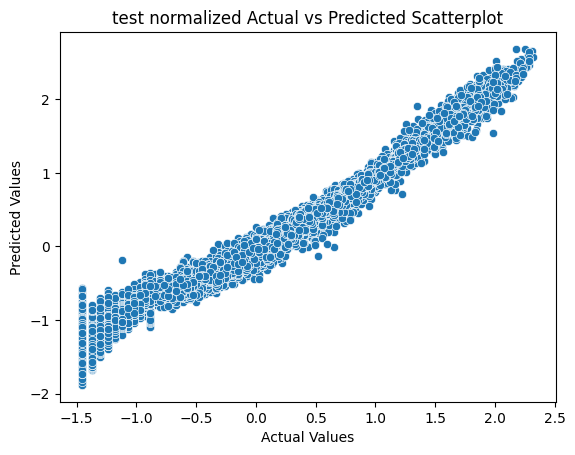

In [22]:
sns.scatterplot(x=y, y=y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('test normalized Actual vs Predicted Scatterplot')
plt.savefig('test_normalized+Act_vs_pred.png')
plt.show()


In [23]:
# number of features scaler was trained on
n_features = len(scaler.mean_)  

# index of target column inside scaler
col_index = list(scaler.feature_names_in_).index('fire_weather_index_transformed')

def inverse_single_column(scaler, values, col_index):
    """
    Inverse transform only one column of a StandardScaler.
    values: (n_samples,) array in scaled space for target column
    col_index: index of target column inside scaler.feature_names_in_
    """
    # create dummy matrix with correct number of features
    dummy = np.zeros((len(values), n_features))
    dummy[:, col_index] = values  # put values only in target column
    
    # inverse transform all features
    inv = scaler.inverse_transform(dummy)
    
    # extract only target column (now back in power-transform space)
    return inv[:, col_index]

In [24]:
# Step 1: inverse StandardScaler
y_train_pred_power = inverse_single_column(scaler, y_test_pred, col_index)
y_train_power = inverse_single_column(scaler, y, col_index)

# Step 2: inverse PowerTransformer
pt = power_transformers['fire_weather_index']
y_train_pred_orig = pt.inverse_transform(y_train_pred_power.reshape(-1, 1)).ravel()
y_train_orig = pt.inverse_transform(y_train_power.reshape(-1, 1)).ravel()

# Step 3: evaluate metrics
from sklearn.metrics import r2_score, mean_squared_error

train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)
train_mse_orig = mean_squared_error(y_train_orig, y_train_pred_orig)

print('Original scale R²:', train_r2_orig)
print('Original scale MSE:', train_mse_orig)

Original scale R²: 0.9375199761875581
Original scale MSE: 10.560895415944936


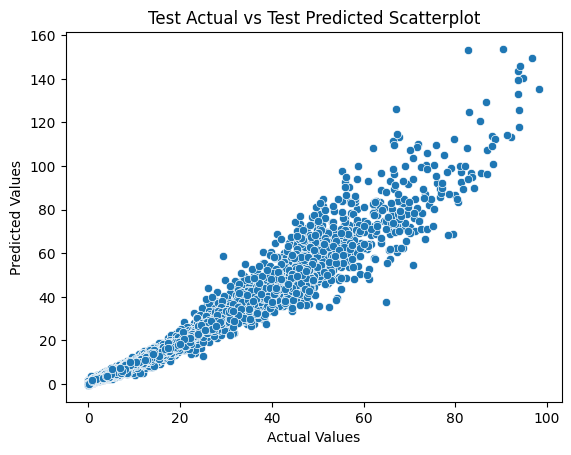

In [25]:
sns.scatterplot(x=y_train_orig, y=y_train_pred_orig)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Actual vs Test Predicted Scatterplot')
plt.savefig('Act_vs_pred_test.png')
plt.savefig("test_data.png")
plt.show()


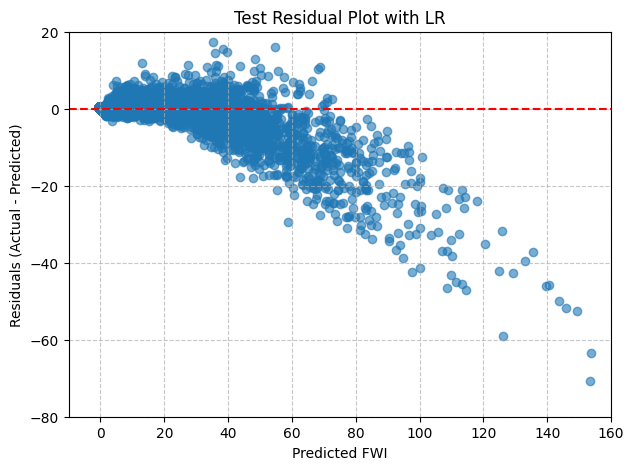

In [26]:
from matplotlib.ticker import MultipleLocator
# Compute residuals
train_residuals = y_train_orig - y_train_pred_orig

# Train residual plot
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred_orig, train_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Test Residual Plot with LR")
plt.ylim(-80, 20)
plt.xlim(-10, 160)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.savefig("Pure_LR_Test_Residual_Plot.png")
plt.show()
